In [1]:

import uproot
import numpy as np
from matplotlib import pyplot as plt
from os import path
plt.rcParams['figure.dpi'] = 300
plt.rcParams.update({"axes.grid" : True, "grid.color": "whitesmoke"})
plt.rcParams['axes.axisbelow'] = True

In [2]:
#Open ROOT file
#file_path = "/Users/bertabeltran/MIST/data/Interposer_test/ag_Interposer_coinc_start_test_AM/RAW/SDataR_ag_coinc_start_test_AM.root"
#file_path = "/Users/bertabeltran/MIST/data/Interposer_test/interposer_64ns_timewindow/RAW/SDataR_interposer_64ns_timewindow.root"
file_path = "/Users/bertabeltran/MIST/data/Interposer_test/interposer_64ns_timewindow_2scint/RAW/SDataR_interposer_64ns_timewindow_2scint.root"
file=uproot.open(file_path)
tree=file["Data_R"]
print(tree.keys())

#Load data for channels and timestamps
#timestamps = tree["Timestamp"].array(library = "np")*10**(-3) #Convert picoseconds to nano
timestamps = tree["Timestamp"].array(library = "np") # picoseconds
channel = tree["Channel"].array(library = "np")
energy = tree["Energy"].array(library = "np")
flags = tree["Flags"].array(library = "np")

['Channel', 'Timestamp', 'Board', 'Energy', 'EnergyShort', 'Flags']


In [3]:
timestamps 

array([    180726641112,     330686380355,     330686382378, ...,
       5550839282011913, 5551261536202312, 5551261536202714], dtype=uint64)

In [4]:
#Create masks for channels
CH0_mask = channel == 0
CH1_mask = channel == 1
#CH2_mask = channel == 2
#CH3_mask = channel == 3

#Get timestamps for each channel (time in picoseconds from the begining of the run)
CH0_timestamps = timestamps[CH0_mask]
CH1_timestamps = timestamps[CH1_mask]
#CH2_timestamps = timestamps[CH2_mask]
#CH3_timestamps = timestamps[CH3_mask]

#Calculate energy of events on each channel
CH0_energy = energy[CH0_mask]
CH1_energy = energy[CH1_mask]
#CH2_energy = energy[CH2_mask]
#CH3_energy = energy[CH3_mask]

# calculate the time difference between coincidences events by looking at the time differences in ch0 for exmaple 
CH0_time_diff = np.diff(CH0_timestamps)

In [5]:
CH0_timestamps

array([    180726641112,     330686382378,     370327879530, ...,
       5550756773835526, 5550839282011913, 5551261536202714], dtype=uint64)

In [6]:
# need to recast the type of these arrays to a dtype which supports negative integers so that I cna subtract them 
CH0_timestamps = CH0_timestamps.astype(np.int64)
CH1_timestamps = CH1_timestamps.astype(np.int64)
#CH2_timestamps = CH2_timestamps.astype(np.int64)
#CH3_timestamps = CH3_timestamps.astype(np.int64)

CH0_energy = CH0_energy.astype(np.int64)
CH1_energy = CH1_energy.astype(np.int64)


In [7]:
CH0_timestamps

array([    180726641112,     330686382378,     370327879530, ...,
       5550756773835526, 5550839282011913, 5551261536202714])

In [8]:
CH0_time_diff

array([149959741266,  39641497152, 320586624082, ...,  58212431488,
        82508176387, 422254190801], dtype=uint64)

In [9]:
# now we transform these time differences into seconds 
CH0_time_diff=CH0_time_diff/1e+12
CH0_time_diff

array([0.14995974, 0.0396415 , 0.32058662, ..., 0.05821243, 0.08250818,
       0.42225419])

In [10]:
len(CH0_timestamps)

26180

In [11]:
len(CH0_energy)

26180

In [12]:
len(CH1_timestamps)

26179

In [13]:
# I am going to create a new array wiith ch0 time stamps as I see that the 0 element is not good 
CH0_timestamps_update=np.delete(CH0_timestamps, 0)
CH0_energy_update=np.delete(CH0_energy, 0)

In [14]:
len(CH0_timestamps_update)

26179

In [15]:
CH0_timestamps[1]

330686382378

In [ ]:
#first we transform the timestamps to ns
CH0_timestamps=CH0_timestamps/1000
CH1_timestamps=CH1_timestamps/1000
CH0CH1_deltat=np.zeros(26179)
for i in range(len(CH1_timestamps)):
    if (abs(CH0_timestamps[i+1]-CH1_timestamps[i])>64):
        print(i, CH0_timestamps[i],CH1_timestamps[i] )
    #else: CH0CH1_deltat[i]=CH0_timestamps[i+1]-CH1_timestamps[i]

In [ ]:
len(CH0CH1_deltat)

In [ ]:
CH0CH1_deltat[20]

In [ ]:
len(CH2_timestamps)

In [ ]:
len(CH3_timestamps)

In [16]:
Ch0ch1_time_diff = CH0_timestamps_update-CH1_timestamps
#Ch0ch2_time_diff = CH0_timestamps-CH2_timestamps
#Ch0ch3_time_diff = CH0_timestamps-CH3_timestamps



In [17]:
len(Ch0ch1_time_diff)

26179

In [18]:
Ch0ch1_time_diff

array([ 2023,  2547, -6031, ..., -4285,  1086,   402])

In [19]:
# we want the time diffrences in ns, not in pico seconds 
Ch0ch1_time_diff=Ch0ch1_time_diff/1000
#Ch0ch2_time_diff=Ch0ch2_time_diff/1000
#Ch0ch3_time_diff=Ch0ch3_time_diff/1000

In [20]:
Ch0ch1_time_diff

array([ 2.023,  2.547, -6.031, ..., -4.285,  1.086,  0.402])

Text(0.5, 1.0, ' $\\Delta$t bettwen two scintillators with the interposer')

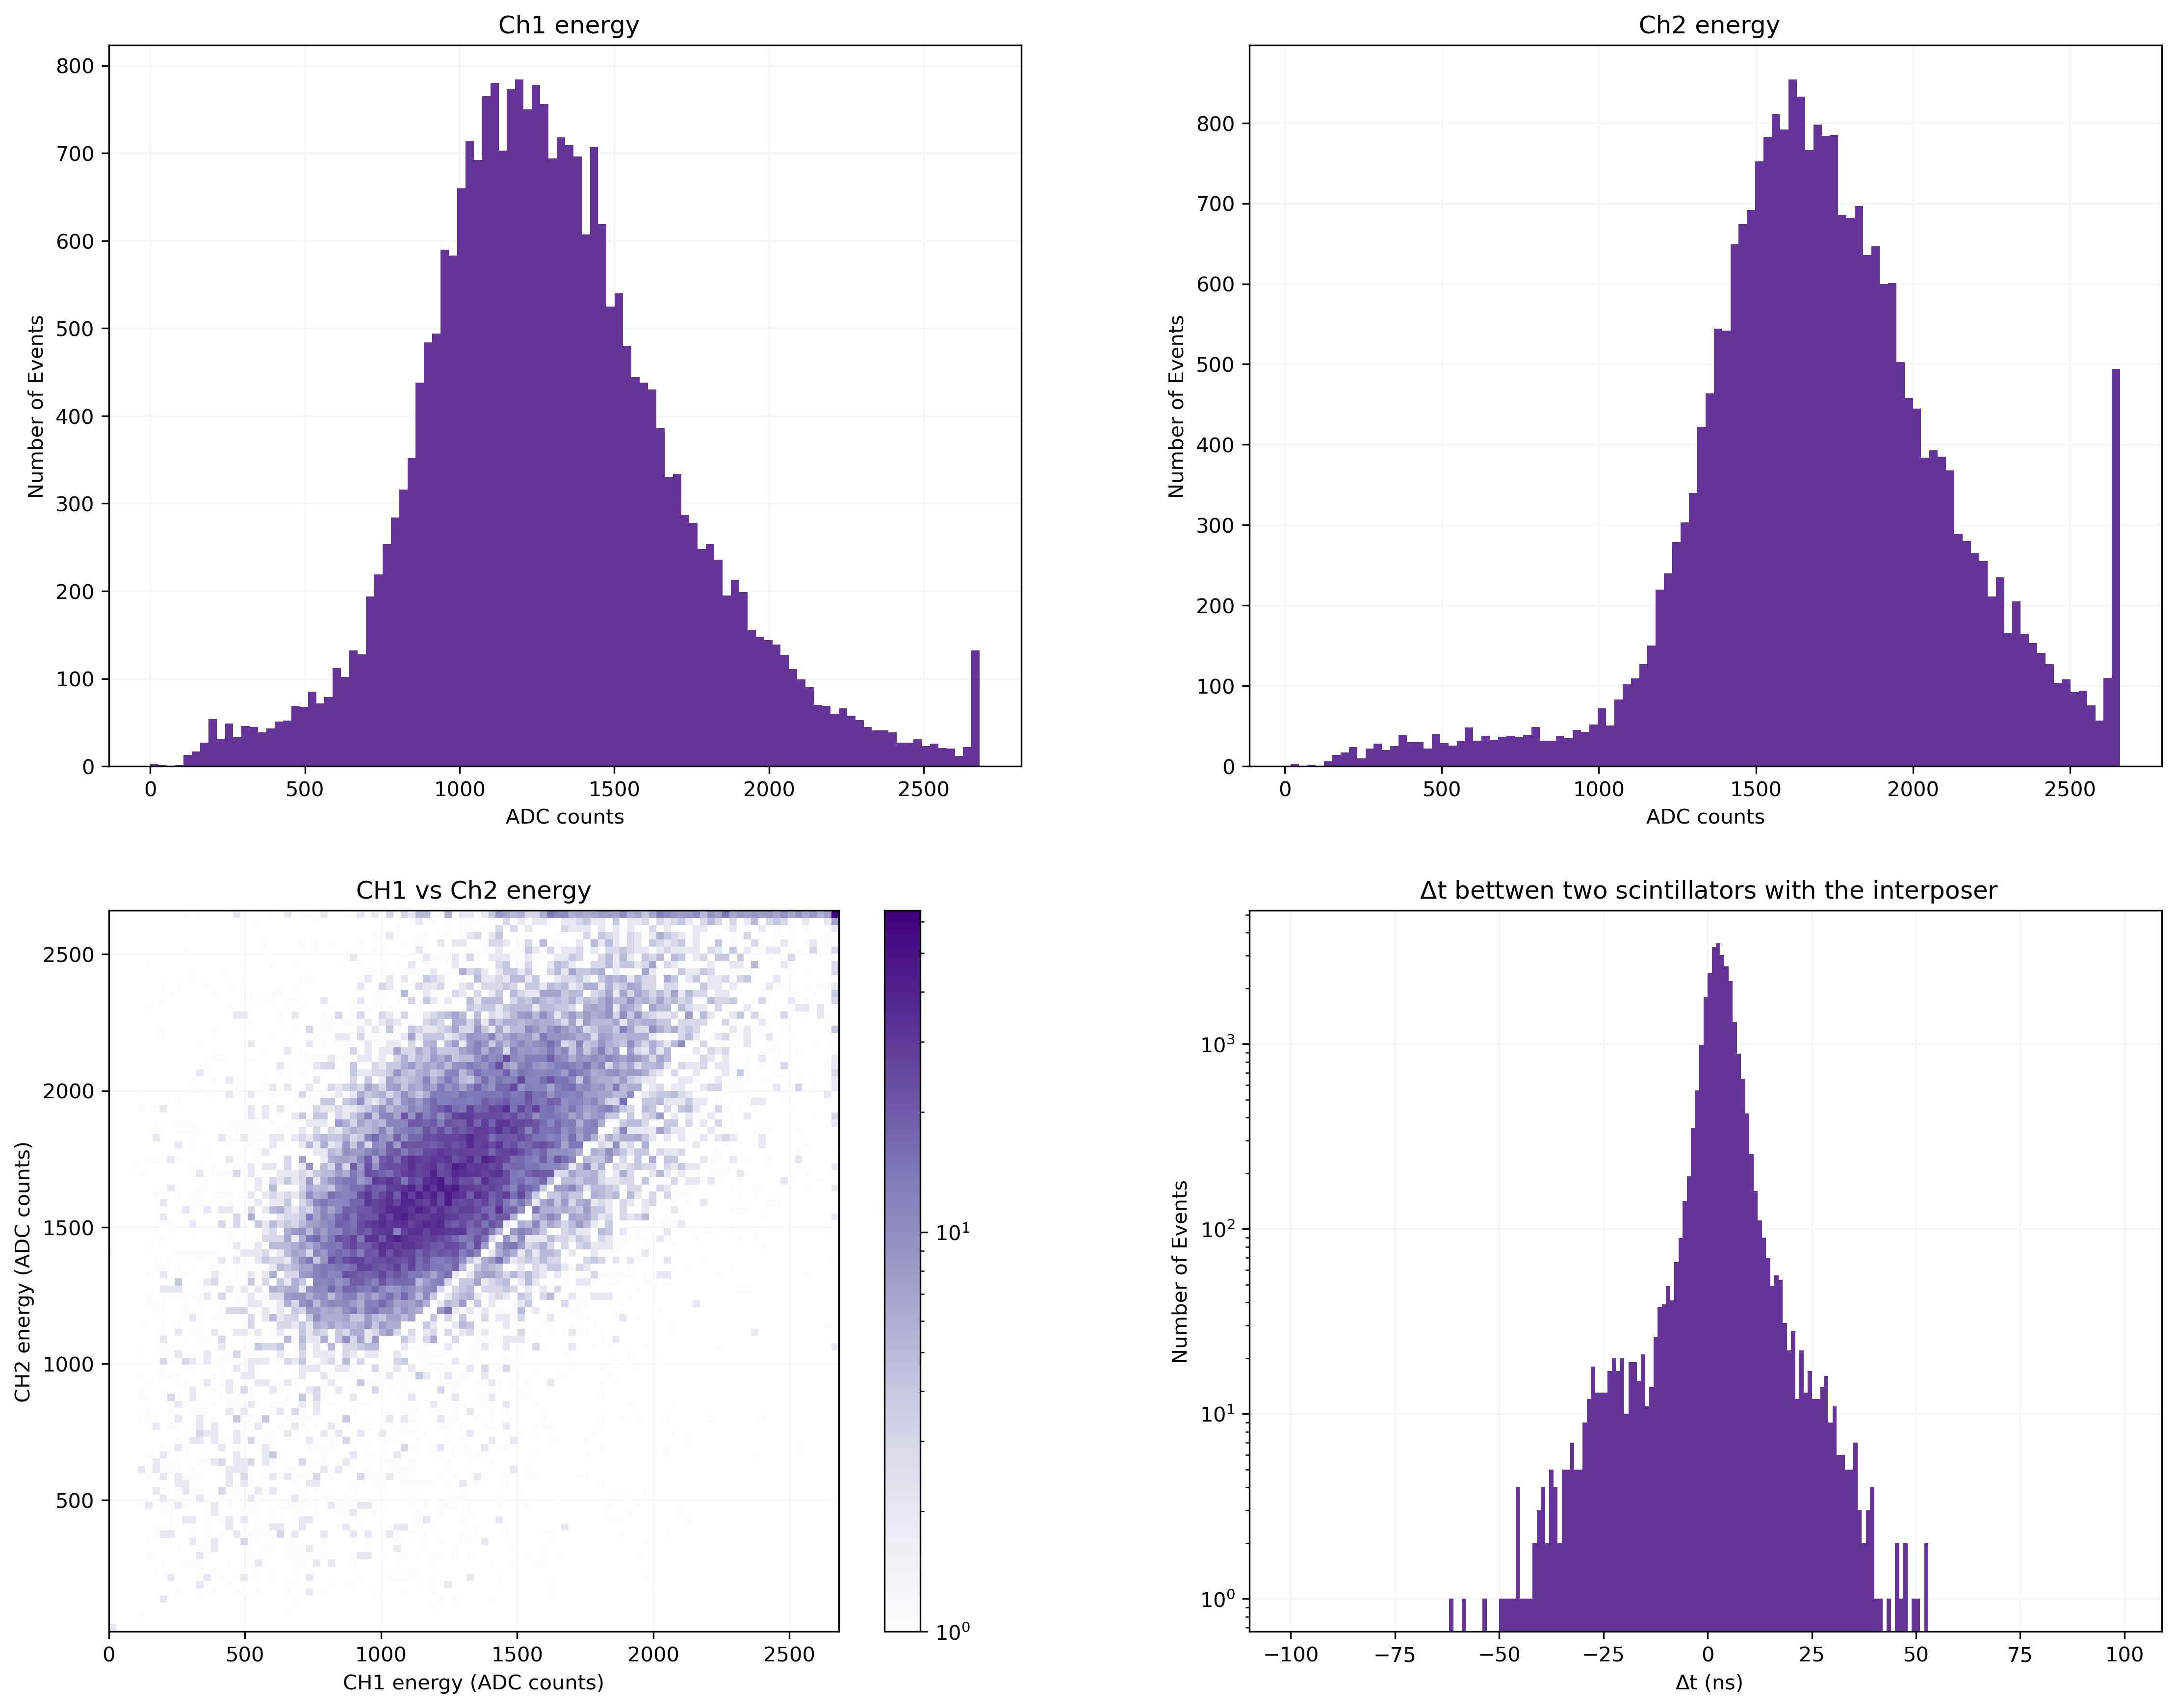

In [32]:
import matplotlib.pyplot as plt 
from matplotlib import colors

fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2,figsize=(18,14))
#fig.supylabel('Number of Events')
#plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

plt.sca(ax0)
plt.hist(CH0_energy_update, bins =100, color='rebeccapurple')
ax0.set_xlabel("ADC counts")
ax0.set_ylabel("Number of Events")
ax0.set_title(" Ch1 energy")
               
               
plt.sca(ax1)
plt.hist(CH1_energy, bins =100,color='rebeccapurple')
ax1.set_xlabel("ADC counts")
ax1.set_ylabel("Number of Events")
ax1.set_title(" Ch2 energy")
               
plt.sca(ax2)
h=plt.hist2d(CH0_energy_update, CH1_energy, bins =100, cmap = 'Purples',norm = colors.LogNorm())
fig.colorbar(h[3])
ax2.set_xlabel("CH1 energy (ADC counts)")
ax2.set_ylabel("CH2 energy (ADC counts)")
ax2.set_title(" CH1 vs Ch2 energy ")     
        

plt.sca(ax3)
plt.hist(Ch0ch1_time_diff, range(-100,100),color='rebeccapurple')
#plt.hist(CH0CH1_deltat, bins=50)
plt.yscale('log')
x_label = " $\Delta$t (ns)"
y_label = 'Number of Events'
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label)
ax3.set_title(" $\Delta$t bettwen two scintillators with the interposer")

Text(0.5, 1.0, ' Scint 2 energy vs $\\Delta$t')

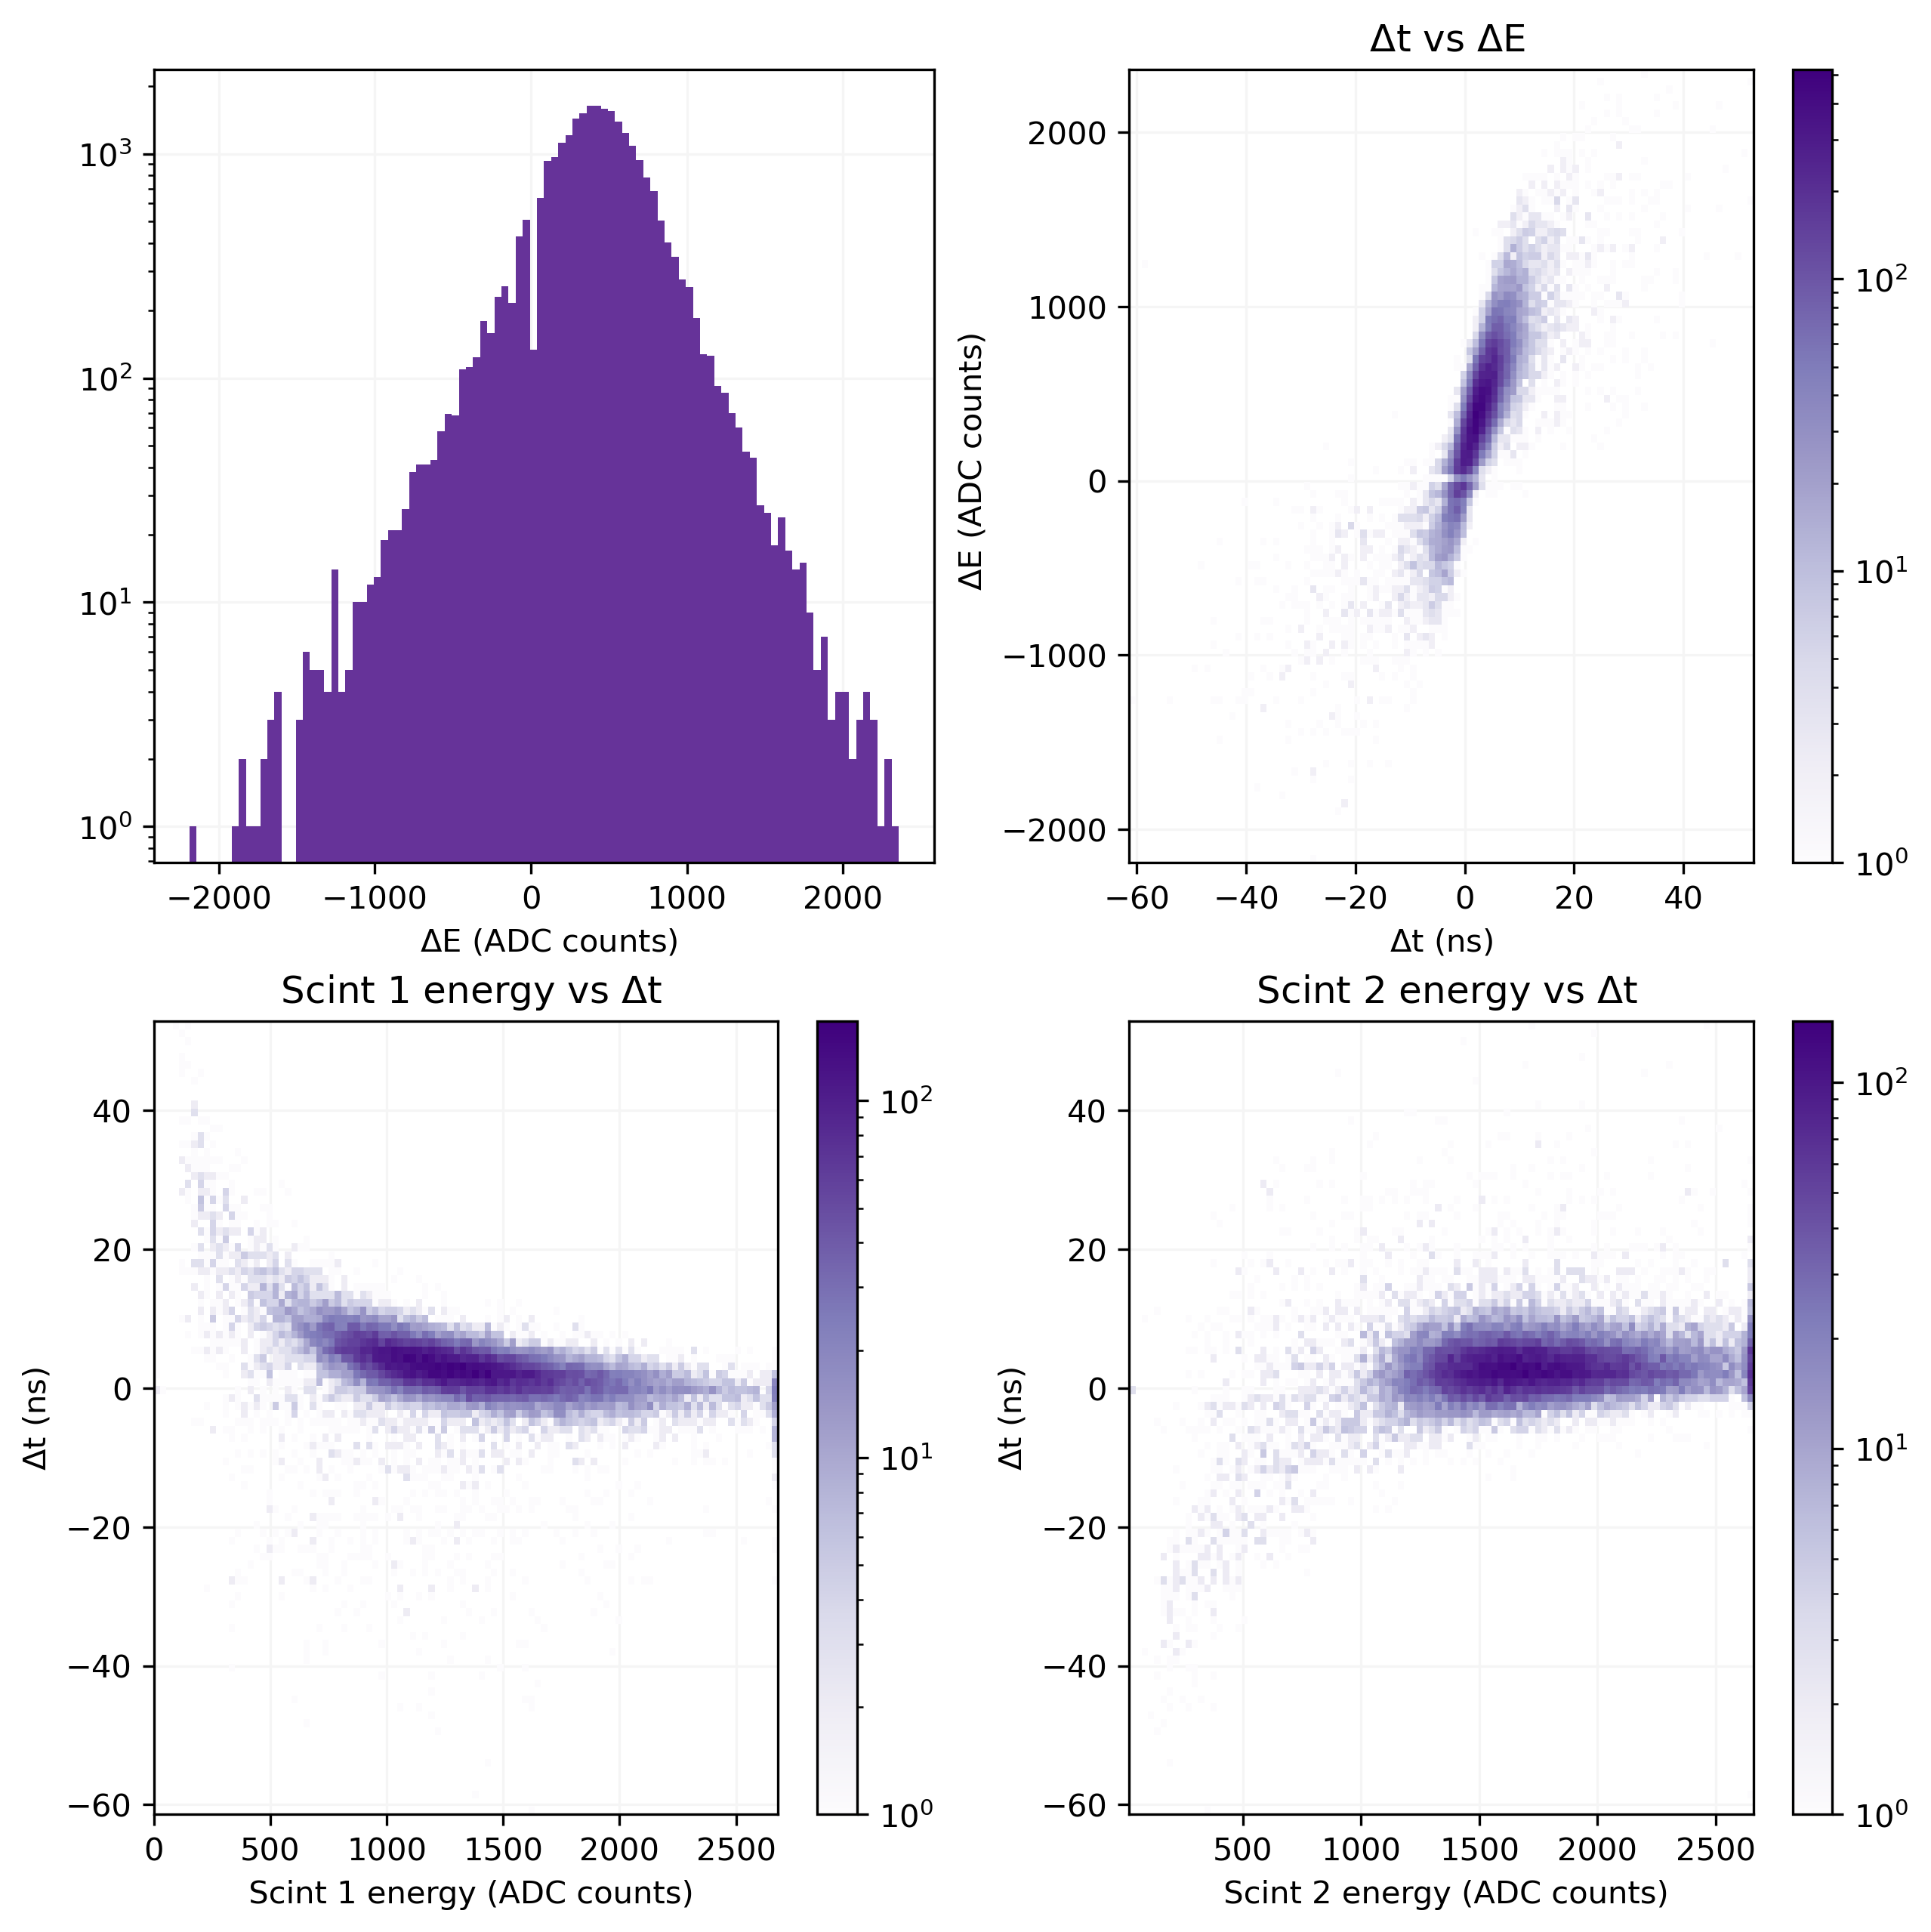

In [37]:
import matplotlib.pyplot as plt 
from matplotlib import colors

deltae=CH1_energy-CH0_energy_update

fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2, figsize=(10,10))
plt.subplots_adjust(wspace=0.25)

plt.sca(ax0)
plt.hist(deltae, bins=100,color='rebeccapurple')
ax0.set_xlabel(" $\Delta$E (ADC counts)")
plt.yscale('log')

plt.sca(ax1)
h2=plt.hist2d(Ch0ch1_time_diff, deltae, bins =100, cmap = 'Purples',norm = colors.LogNorm())
fig.colorbar(h2[3])
ax1=plt.gca()
ax1.set_xlabel('$\Delta$t (ns)')
ax1.set_ylabel(" $\Delta$E (ADC counts)")
ax1.set_title(" $\Delta$t vs $\Delta$E")


plt.sca(ax2)
h3=plt.hist2d(CH0_energy_update, Ch0ch1_time_diff, bins =100, cmap = 'Purples',norm = colors.LogNorm())
fig.colorbar(h3[3])
ax2=plt.gca()
ax2.set_ylabel('$\Delta$t (ns)')
ax2.set_xlabel(" Scint 1 energy (ADC counts)")
ax2.set_title(" Scint 1 energy vs $\Delta$t")

plt.sca(ax3)
h4=plt.hist2d(CH1_energy, Ch0ch1_time_diff, bins =100, cmap = 'Purples',norm = colors.LogNorm())
fig.colorbar(h4[3])
ax3=plt.gca()
ax3.set_ylabel('$\Delta$t (ns)')
ax3.set_xlabel(" Scint 2 energy (ADC counts)")
ax3.set_title(" Scint 2 energy vs $\Delta$t")


#fig.align_labels()


In [ ]:
#Create plots
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2,figsize=(18,14))
#fig.supylabel('Number of Events')
#plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 100 
range_down = -70
range_up= 70
x_label = " $\Delta$t ns"
y_label = 'Number of Events'

#Add grid
ax0.grid(show_grid)
ax0.set_axisbelow(True)
ax1.grid(show_grid)
ax1.set_axisbelow(True)
ax2.grid(show_grid)
ax2.set_axisbelow(True)
ax3.grid(show_grid)
ax3.set_axisbelow(True)


# Plot time differeces between ch0 and ch1 
#plt.sca(ax0)
#ax0.set_title("Scint1 - Scint2 Time Differences ")
#ax0.set_xlabel(x_label)
#ax0.set_ylabel(y_label)
#ax0.hist(Ch0ch1_time_diff, bins = bin_num, range=(range_down,range_up), histtype='stepfilled' , color ='blue')
#plt.yscale('log')

# Plot time differeces between ch0 and ch2 
plt.sca(ax1)
ax1.set_title("Scint1 - Scint3 Time Differences ")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.hist(Ch0ch2_time_diff, bins = bin_num, range=(range_down,range_up),histtype='stepfilled' , color ='blue')
plt.yscale('log')

# Plot time differeces between ch0 and ch3 
plt.sca(ax2)
ax2.set_title("Scint1 - Scint4 Time Differences ")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.hist(Ch0ch3_time_diff, bins = bin_num, range=(range_down,range_up) , color ='blue')
plt.yscale('log')


#Plot time difference in chan 0
plt.sca(ax3)
ax3.set_title("Scint1 Event Time Differences")
ax3.set_xlabel("Time differeces (s) ")
ax3.set_ylabel(y_label)
ax3.hist(CH0_time_diff, bins = bin_num,histtype='stepfilled' , color ='orange')
plt.yscale('log')


plt.show()


In [ ]:
# now I am going to try and fit the time differences plot 

import numpy as np
from scipy.optimize import curve_fit
#firts I define the exponential fucntion that I will be fitting 
def expo(x, a, b):
    return  np.exp(a+(b*x))

#here I caculate the bin centers for the fit               
def bincenters(bins):
    return (bins[1:] + bins[:-1]) / 2
                   
# define the histogram that I will be fitting to and return the bin contents and the bid edeges    
bin_cont, bin_edges, patches = plt.hist(CH0_time_diff, bins = bin_num,histtype='stepfilled' , color ='blue',label ="Time Differences")
                   
# here I do the fit a return the fit values     
param, param_cov = curve_fit(expo, bincenters(bin_edges),bin_cont)
                   
# print the values     
print("Expo function coefficients:")
print(param)
print("Covariance of coefficients:")
print(param_cov)

# now I also want to draw the fitted function on top of the histogram 
fit_func= expo(bincenters(bin_edges),param[0] ,param[1] )
plt.plot(bincenters(bin_edges), fit_func, 'red', linewidth=2, label ="fit function ")       

fit_eq= r"exp$({:.2f} {:.2f}x)$".format(param[0] ,param[1])

ax=plt.gca()
ax.text(1.6, 100, fit_eq, fontsize=15)
ax.text(2, 10, "rate={:.2f} cps".format(abs(param[1])), fontsize=15)

plt.legend()
plt.yscale('log')
ax.set_title("Scint1 Event Time Differences")
ax.set_xlabel("Time differeces (s) ")
ax.set_ylabel(y_label)
plt.show()
                   

In [ ]:
#Create energy plots
fig, ((ax0,ax1),(ax2,ax3)) = plt.subplots(2, 2,figsize=(18,14))
#fig.supylabel('Number of Events')
plt.figure(fig.number)
plt.subplots_adjust(wspace=0.25)

#Settings
show_grid = True
bin_num = 100 
range_down = -30
range_up= 30
x_label = " ADC counts"
y_label = 'Number of Events'


#Add grid
ax0.grid(show_grid)
ax0.set_axisbelow(True)
ax1.grid(show_grid)
ax1.set_axisbelow(True)
ax2.grid(show_grid)
ax2.set_axisbelow(True)
ax3.grid(show_grid)
ax3.set_axisbelow(True)


# Plot ch0 energy 
plt.sca(ax0)
ax0.set_title("Scint 1 Energy ")
ax0.set_xlabel(x_label)
ax0.set_ylabel(y_label)
ax0.hist(CH0_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# Plot ch1 energy 
plt.sca(ax1)
ax1.set_title("Scint 2 Energy ")
ax1.set_xlabel(x_label)
ax1.set_ylabel(y_label)
ax1.hist(CH1_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# Plot ch2 energy 
plt.sca(ax2)
ax2.set_title("Scint 3 Energy ")
ax2.set_xlabel(x_label)
ax2.set_ylabel(y_label)
ax2.hist(CH2_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')


# Plot ch3 energy
ax3.set_title("Scint 4 Energy ")
ax3.set_xlabel(x_label)
ax3.set_ylabel(y_label)
ax3.hist(CH3_energy, bins = bin_num, histtype='stepfilled' , color ='blue')
#plt.yscale('log')

plt.show()

In [ ]:
# creat one histogram with all the energy plots to compare with Adam 
import matplotlib.pyplot as plt 
plt.hist(CH0_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='blue', label='Scint 1')
plt.hist(CH1_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='orange', label='Scint 2')
plt.hist(CH2_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='green', label='Scint 3')
plt.hist(CH3_energy, bins = bin_num, range=(0,2500),histtype='stepfilled' , color ='violet', label='Scint 4')
ax = plt.gca()
ax.set_xlabel("ADC counts")
plt.legend(loc='best', frameon=False)

In [ ]:
# caculate the event rate for chan 0 
# first convert the time stamps to seconds 
CH0_timestamps=CH0_timestamps/1e+12
CH0_timestamps

In [ ]:
rate=np.floor(CH0_timestamps)
rate


In [ ]:
import ROOT
from ROOT import gStyle
from ROOT import gPad
gStyle.SetOptStat(0)



In [ ]:
hist=ROOT.TH1D("h1", "Rate", 6833, 0, 6831)
for xeach in rate:
    hist.Fill(xeach)
    
# Fit histogram with root #
hist.Fit('pol0')

# Get Root Fit and Goodness of Fit Parameters #
f = hist.GetFunction('pol0')
const = f.GetParameter(0)
econst= f.GetParError(0)
ndf,chi2,prob = f.GetNDF(),f.GetChisquare(),f.GetProb()

print(chi2, ndf)
print(chi2/ndf,prob)
    
c1 = ROOT.TCanvas("c0"," ",800,600)
hist.Draw()
c1.Draw()


In [ ]:
import matplotlib.pyplot as plt 
bin_contents, bin_edges, patches =plt.hist(rate,bins = 2967)
#bin_contents, bin_edges, patches =plt.hist(rate, bins = 6832,range=(0,6831))
#bin_centers = bin_edges[:-1] + np.diff(bin_edges) / 2
ax = plt.gca()
ax.set_ylabel("Count per second")
ax.set_xlabel("Seconds from the begining of the run")

In [ ]:
np.mean(bin_contents)

In [ ]:
bin_edges

In [ ]:
import matplotlib.pyplot as plt 
from scipy.stats import norm

plt.hist(bin_contents, density=True,bins =12,range=(0,12))

# Fit a normal distribution to
# the data:
# mean and standard deviation
mu, std = norm.fit(bin_contents) 

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
 
plt.plot(x, p, 'red', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
plt.title(title)
ax = plt.gca()
ax.set_xlabel("Rate (counts per second)")
 
plt.show()